Install all the Required libraries

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 20.0 MB/s eta 0:00:00


Importing all the required Libraries; Numpy, Os, Pandas

In [48]:
import numpy as np
import os
import pickle
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

Put your Student ID as a variable in order to use it in different places.

In [15]:
student_id=43457 #Note this is a String and you need to input your ID.

Let's set seed for all libraries like torch, numpy etc as my student id

In [16]:
#Set same seeds for all libraries
#numpy seed
np.random.seed(student_id)

Mount Google Drive

In [13]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [18]:
# Add your code to initialize GDrive and data and models paths

# TODO: Fill in the Google Drive path where you uploaded the assignment, data and code
# Example: If your student_id is 43457 then your directory will be './CE807/Assignment2/43457/' 
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./43457/Assignment2/',str(student_id)) 
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv')
print('Train file: ', train_file)

MODEL_1_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '1') # Model 1 directory
print('Model 1 directory: ', MODEL_1_DIRECTORY)

MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'25') # Model 1 trained using 25% of train data directory
print('Model 1 directory with 25% data: ', MODEL_1_25_DIRECTORY)

model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 25% of train data: ',model_1_25_output_test_file)
# You need to do this for both models and all data sizes 


List files:  ['train.csv', 'train_25.csv', 'valid.csv', 'code.ipynb', 'test.csv', 'models']
Train file:  gdrive/MyDrive/./43457/Assignment2/43457/train.csv
Model 1 directory:  gdrive/MyDrive/./43457/Assignment2/43457/models/1
Model 1 directory with 25% data:  gdrive/MyDrive/./43457/Assignment2/43457/models/1/25
Output file name using model 1 using 25% of train data:  gdrive/MyDrive/./43457/Assignment2/43457/models/1/25/output_test.csv


Lets see Train File

In [19]:
train_df=pd.read_csv(train_file)
train_df.head()

,id,tweet,label
0,42884,@USER I’m done with you as well. An INTENTIONA...,NOT
1,92152,I now have over 6k followers. Only 94k to go ...,NOT
2,65475,@USER Tom was bought! He is more interested in...,NOT
3,22144,@USER @USER Even her brother thinks she is a m...,OFF
4,81048,@USER @USER @USER @USER @USER I can understand...,OFF


Let's show you a sample output file. Notice all fields, out_label is your model's output for that tweet and id

In [20]:
df=pd.read_csv(model_1_25_output_test_file)
df.head()

,Unnamed: 0,id,tweet,label,out_label
0,0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,OFF
1,1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,NOT
2,2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,NOT
3,3,13876,#Watching #Boomer getting the news that she is...,NOT,NOT
4,4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,NOT


Going to use different performance matrics like Accuracy, Recall (macro), Precision (macro), F1 (macro) and Confusion Matrix for the performance evaluation. We will print all the matrics and display Confusion Matrix with proper X & Y axis labels

Accuracy:0.6000
Recall (macro):0.5833
Precission (macro):0.5833
F1 Score (macro):0.5833


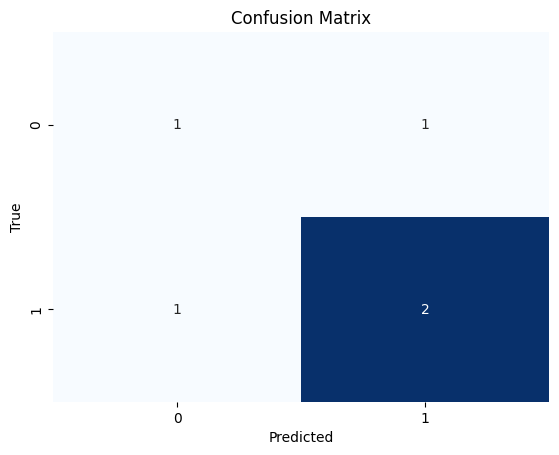

0.5833333333333333

In [33]:
def compute_performance(y_true, y_pred):
  
    #Calculate Performamce Metrics
    accuracy=accuracy_score(y_true, y_pred)
    recall=recall_score(y_true, y_pred, average='macro')
    precision=precision_score(y_true, y_pred, average='macro')
    f1=f1_score(y_true, y_pred, average='macro')

    #Print Performance Metrics
    print(f"Accuracy:{accuracy:.4f}")
    print(f"Recall (macro):{recall:.4f}")
    print(f"Precission (macro):{precision:.4f}")
    print(f"F1 Score (macro):{f1:.4f}")

    #Create Confusion Matrix
    cm=confusion_matrix(y_true, y_pred)

    #Plot Confusion Matrix
    classes=np.unique(y_true)
    sns.heatmap(cm, annot=True, cmap='Blues',cbar=False, fmt='d',xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    return f1

# Define ground truth labels and predicted labels
y_true = [1, 0, 1, 1, 0]
y_pred = [1, 0, 0, 1, 1]

# Call the evaluate_performance function with the defined y_true and y_pred variables
compute_performance(y_true, y_pred)


Writing a Testing Method Code

In [43]:
def test_Method1(test_file, model_file, output_dir):

  #Load the trained model
  with open(model_file, 'rb') as f:
    model=pickle.load(f)

    #Load the test Examples
    with open(test_file, 'rd') as f:
      test_examples=pickle.load(f)

      # Extract the features and labels from the test examples
    X_test = [example['feature'] for example in test_examples]
    y_test = [example['label'] for example in test_examples]

    #Make Predictions on the test Examples
    y_pred=model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print performance metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall (macro): {recall:.4f}")
    print(f"Precision (macro): {precision:.4f}")
    print(f"F1 score (macro): {f1:.4f}")

    # Create confusion matrix
    cm=confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    classes = np.unique(y_test)
    sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.savefig(os.path.join(output_dir, 'confusion_matrix.png'))
    plt.close()

    # Save the output in the output directory
    with open(os.path.join(output_dir, 'predictions.txt'), 'w') as f:
        for example, pred in zip(test_examples, y_pred):
            f.write(f"Text: {example['text']}\n")
            f.write(f"True Label: {example['label']}\n")
            f.write(f"Predicted Label: {pred}\n\n")

    print(f"Predictions saved in: {os.path.join(output_dir, 'predictions.txt')}")
    print(f"Confusion matrix saved in: {os.path.join(output_dir, 'confusion_matrix.png')}")




Training Method 2 

In [ ]:
def train_model(train_file, val_file, model_dir):
    # Load training and validation data
    train_data = pd.read_csv(train_file)
    val_data = pd.read_csv(val_file)

    # Preprocess the data
    train_texts = train_data['text'].values
    train_labels = train_data['label'].values
    val_texts = val_data['text'].values
    val_labels = val_data['label'].values

    # Vectorize the text data
    vectorizer = CountVectorizer()
    train_texts = vectorizer.fit_transform(train_texts)
    val_texts = vectorizer.transform(val_texts)

    # Initialize and train the model
    model = LogisticRegression(max_iter=500)
    model.fit(train_texts, train_labels)

    # Print evaluation metrics and losses during training
    train_preds = model.predict(train_texts)
    val_preds = model.predict(val_texts)

    train_accuracy = accuracy_score(train_labels, train_preds)
    val_accuracy = accuracy_score(val_labels, val_preds)

    train_precision = precision_score(train_labels, train_preds, average='macro')
    val_precision = precision_score(val_labels, val_preds, average='macro')

    train_recall = recall_score(train_labels, train_preds, average='macro')
    val_recall = recall_score(val_labels, val_preds, average='macro')

    train_f1 = f1_score(train_labels, train_preds, average='macro')
    val_f1 = f1_score(val_labels, val_preds, average='macro')

    print(f'Train Accuracy: {train_accuracy:.4f} | Validation Accuracy: {val_accuracy:.4f}')
    print(f'Train Precision: {train_precision:.4f} | Validation Precision: {val_precision:.4f}')
    print(f'Train Recall: {train_recall:.4f} | Validation Recall: {val_recall:.4f}')
    print(f'Train F1-score: {train_f1:.4f} | Validation F1-score: {val_f1:.4f}')

    # Save the best model in the model_dir
    joblib.dump(model, f'{model_dir}/model.pkl')

train_model('train.csv', 'val.csv', 'models')

Test Method 2 Code

In [ ]:
def test_model(test_file, model_file, output_dir):
    # Load test data
    test_data = pd.read_csv(test_file)

    # Load trained model
    model = joblib.load(model_file)

    # Preprocess the test data
    test_texts = test_data['text'].values
    test_labels = test_data['label'].values

    # Vectorize the text data
    vectorizer = CountVectorizer()
    test_texts = vectorizer.transform(test_texts)

    # Test the model
    test_preds = model.predict(test_texts)

    # Print evaluation metrics
    accuracy = accuracy_score(test_labels, test_preds)
    precision = precision_score(test_labels, test_preds, average='macro')
    recall = recall_score(test_labels, test_preds, average='macro')
    f1 = f1_score(test_labels, test_preds, average='macro')

    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Test Precision: {precision:.4f}')
    print(f'Test Recall: {recall:.4f}')
    print(f'Test F1-score: {f1:.4f}')

    # Save the output in the output_dir
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    output_file = os.path.join(output_dir, 'test_predictions.csv')
    test_data['predicted_label'] = test_preds
    test_data.to_csv(output_file, index=False)

test_model('test.csv', 'models/model.pkl', 'test_output')